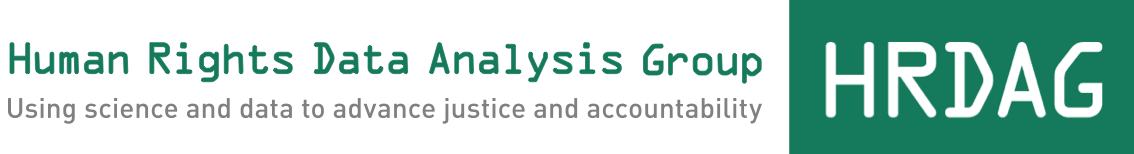

In [1]:
from IPython.display import Image
Image(filename='imgs/banner.png')

In [2]:
%load_ext pretty_jupyter

/Users/home/opt/miniconda3/envs/toolkit/lib/python3.13/site-packages/pretty_jupyter/constants.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
%%html

<style>
    #Styling {
        font-weight: bold;
        font-family: Helvetica;
    }
</style>

# Chapter four: Missingness - Who is represented?

# setup data

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# dependencies
import pandas as pd

In [2]:
# support methods
def format_count(v):
    return "{:,}".format(v)


def format_float(v, decn=1):
    return round(v, decn)


def format_prop(prop, decn=1, asperc=True):
    if asperc: prop = prop*100
    return "{}%".format(round(prop, decn))


def report_fields(df, idcol, cols, fillval='NO DATA'):
    data = df[[idcol] + cols].drop_duplicates()
    if fillval:
        count = data[cols].fillna(fillval).value_counts().to_frame().reset_index()
        perc = data[cols].fillna(fillval).value_counts(normalize=True).to_frame().reset_index(
            ).rename(columns={'proportion': 'percent'})
    else:
        count = data[cols].value_counts().to_frame().reset_index()
        perc = data[cols].value_counts(normalize=True).to_frame().reset_index(
            ).rename(columns={'proportion': 'percent'})
    count['count'] = count['count'].apply(lambda x: f"{x:,}")
    perc.percent = perc.percent.apply(lambda x: f"{x*100:.2f}%")
    out = pd.merge(count, perc, on=cols)
    return out

In [3]:
# main
basic = ['race', 'sex', 'age', 'age_group', 'address',
         'date_occurred', 'year_occurred',
         'date_officer_arrived', 'notification_time', 'closed_date',
         'status', 'primary', 'description',
         'original_iucr', 'current_iucr',]
mp = pd.read_parquet("../data/cpd_mp.parquet")
mp = mp.loc[mp.year_occurred < 2023].copy()

# Missingness: who is represented?

Missing data can appear in several ways in a data, each affecting data analysis in different ways. Here we consider the three dimensions along which missing data is encountered in the FOIA data that informed Trina and Sarah's investigation:

- missing rows: undocumented losses. When someone disappears but their disappearance does not leave the administrative paperwork trail that we rely on, their disappearance goes unrepresented in our data.
- missing values within columns: We rely on demographic variables in the data in order to better understand whose experiences are reflected in it, and thus who is most directly impacted by the way CPD handles reports of missing people.
- missing columns: Unmeasured characteristics. For example, we don't know from this data how many of the reports are about someone who is disabled.

## Missing rows: reports that were never created

Not every disappearance results in the creation of a Missing Person report, and hence a record in our database. These are the steps required for a disappearance to become a record in our database:

1. Someone believes the person to be missing and is concerned
2. Someone who has noticed the person is missing goes to the police to report them misisng
3. The police who are at the station that day agree to take the report and open an investigation
4. A report recorded on paper must go through some digitization process in order to become a record in a database. (from Trina and Sarah's *Chicago Reader* story: "police sources told City Bureau and Invisible Institute that the missing person case report is one of the few remaining incident reports done on paper")
4. The record of this report is deemed by the person charged with responding to a FOIA reqest to be responsive to our request, and thus included in the data returned.

At each step, we have the potential for a disappearance to go unreported. If someone moves around regularly, then their absence might not cause immediate alarm and hence not register as a disappearance. Some cases, also known as "throwaway children" never make it to Chicago Police Hands. Instances where parents didn't take the time to report their children as missing. We operate in an ecosystem where institutions like the Chicago Public School System or the Department of Children and Families Services. There are mechanisms in place which require that a missing person is made for children in care to release them from the housing program and acknowledge to the state the child is no longer in thier care. People who work in our schoolsystem, local community organizations, and others with high touch on vulnerable populations. Although some resources exist, the overwhelming majority of people experiences abuse are so isolated that they never have the opportunity to reported missing. Missed by who? The person who is responsible for their disappearance?

Further, some people do not feel safe going to the police for help, or worry that such an interaction would put them at new risk. For example this can be due to immigration status, existing history with the criminal-legal system, or real or perceived participation in criminalized forms of labor. Tk Quote from Susan Frankel from the National Runaway Safeline that says the majority of the youth they correspond with do not include law enforement. What that suggests is that this form of missingness is not randomly distributed across the population, but rather it disproportionately affects the visibility of particular groups of marginalized people. Without additional data or information about how likely people in different communities are to go to the police when someone is missing, we can't quantify this missingness.

Even if someone goes to the police to report a disappearance, the police might not file a report. From the year 2000 to 2006, there was no law about the timeline for reporting someone missing in Chicago. There was a culture of telling people to wait or being told that they did not have the authority to report their loved ones missing. This legislation was sponsored through tk invdividuals (two people we spke to on the phone. who connected us to the ISP). The Department of Justice gathered people at a conference in Colorado about missing persons. Then they established  a working group who came up with The Missing persons Identification Act. Chicago Police can not refuse a missing persons case on any Chicago Police Department Grounds. The report must happen in person; meaning some interaction with some Chicago Police in person must occur so that the report can be made. Police directives say that cases go through the ARS system. However, the ARS communications say that they do not do missing persons cases.

Through our work on [Beneath the Surface](https://btsurface.com/), which looked at data on complaints against police between 2011 and 2015, we know that people in Chicago continued to have the experience of being denied assistance when trying to report a missing loved one even after the 2006 policy changes. For example, [CR-ID 1072492](https://www.documentcloud.org/app?q=+data_cr_id:%221072492%22):

>The complainant alleged that when she called the 020th District station to file a missing person's report for her 17 year old daughter, the accused laughed at her and told her there was nothing he could do. 

Or [CR-ID 1066221](https://www.documentcloud.org/app?q=+data_cr_id:%221066221%22):

>The reporting party alleges she called 911 regarding her daughter being taken illegally out of the state of Illinois by the custodial father of the child The reporting party alleges that a Hispanic female and a black
male uniformed officer and a white male white male plainclothes supervisor arrived on the scene and that they failed to assist her The reporting party alleges that the white male plainclothes supervisor mentioned above became rude and unprofessional towards her for no apparent reason. The reporting party alleges that the supervisor stated to her in an aggressive manner, "Do you have court papers, that's her father, you don't have this or that, she
can go wherever she wants, I'm going to write this up a certain way and put this in the system so when you call the police no one Is going to help you, it will show that I have taken care of this" The reporting party alleges that the supervisor ordered a Hispanic female and a black male uniformed officer not to process a missing person police report for her in regards to the victim [redacted], the reporting party further alleges that this is the same supervisor that a complaint was filed by an anonymous person, who claimed that there was excessive force against a young female subject, which happens to [redacted]

We have identified 20 such complaints in the Chicago PD complaint data from 2011-2015. People who have this experience do not necessarily file complaints, or even know that the Chicago PD has acted against their own policies. If these experiences affect one group more than another, for example if the Chicago PD is more likely to be rude to people from one racial group than another, then this form of missingness would affect those groups disparately, distorting our understanding of who is experiencing disappearance.

In all, we have a variety of distinct sources of under-reporting that will affect what is observed in different ways. Further, these routes to under-reporting make clear that rates of underrporting will vary by the race, class, gender, sexuality, immigration status, spoken language, and other characteristics of the missing person or their would-be reporters. Without additional data, we can't say too much about experiences of missingness that don't result in the filing of a CPD missing persons report beyond acknowledging the issue. For this reason, our stories have focused on reports of missing people and how they are handled.

In addition to these factors, there is also the possibility that a missing persons report is opened, but we do not receive a record about it and so it is missing from our database. In practice, a FOIA officer must determine which subset of records across available databases are responsive to a given request, and different individuals may make slightly different determinations.

Unlike with the other sources of missingness, we *do* have some data available to help quantify this type of missingness: for this story, we ended up making multiple FOIA requests for data from overlapping time periods. We compared the records received from different FOIA requests that cover the same time period. In this way, we are able to count the number of records that are missing from one source, but not another. By doing this across sources, we can get a sense of what records are missing from *every* source. Here is the total number of distinct RD numbers per FOIA request. We could not run distinct on the dataset provided in Jan 2023 because they provided "J" instead of RD numbers for juvenile cases in that FOIA request.

In [5]:
# some records only have ucrs data but were not part of any foia for missing persons data
# we are not including those here
mp = mp[mp.source.notna()]

def simplify_sourcenames(sources):
    out = sources.copy()
    out[out.str.contains('second')] = 'second'
    out[out.str.contains('third') ] = 'third'
    return out
    

# list of sources a record are given as a pipe-delimited string
mp['sources'] = mp.source.str.split('|').apply(list)
sources = mp.explode('sources')[['rd_no', 'year_occurred', 'sources']]
sources['sources'] = simplify_sourcenames(sources.sources)
by_source = sources.drop_duplicates().reset_index()
by_source

,index,rd_no,year_occurred,sources
0,0,F012033,2000,third
1,0,F012033,2000,fifth
2,0,F012033,2000,first
3,0,F012033,2000,sixth
4,0,F012033,2000,second
...,...,...,...,...
2088711,301,HW137496,2013,iucrs
2088712,305,HW220644,2013,iucrs
2088713,310,HW278331,2013,iucrs
2088714,318,HW530680,2013,iucrs


In [6]:
by_source.sources.value_counts()

sources
fourth    352712
fifth     352711
sixth     352709
third     350141
second    341334
first     338796
iucrs        313
Name: count, dtype: int64

By comparing records across any two of these lists, we can identify records that appear in one source but are missing in the other, which gives us a lower bound for that source on the number of missing persons reports that exist but were not sent to us in response to our FOIA request. For example, here are records that we know are missing from our sixth request (foia #: P835843), because they appear in our fifth request (foia #: P771301):

In [7]:
fifth_rdnos = set(by_source.loc[by_source.sources == 'fifth', 'rd_no'])
sixth_rdnos = set(by_source.loc[by_source.sources == 'sixth', 'rd_no'])
diff = fifth_rdnos - sixth_rdnos
mp.loc[mp.rd_no.isin(diff),
       ['rd_no', 'race', 'sex', 'age', 'age_group',
        'date_occurred', 'date_officer_arrived',
        'det_inv_assgn_last_name', 'det_inv_assgn_first_name']]

,rd_no,race,sex,age,age_group,date_occurred,date_officer_arrived,det_inv_assgn_last_name,det_inv_assgn_first_name
79277,HH751559,BLACK,F,13.0,youth (10-20),2002-10-31 08:00:00,2002-11-01 01:30:00,HARDY,TIMOTHY
163533,HR656898,BLACK,F,14.0,youth (10-20),2009-11-20 06:45:00,2009-11-23 11:10:00,SKRIP,LAURA


More generally, we can summarize all of the patterns of overlap between sources. This can give us information about how many records are missing overall. If every source was missing a large number of records, that would lead us to believe that there are more than a few records that are missed by every source.

In this case, since we see a lot of overlap in coverage across all of the sources, that gives us some confidence that there are few, if any, records missing from all sources.

In [9]:
sources['dummy'] = 1
source_counts = sources \
    .pivot_table(index='rd_no', columns='sources',
                 values='dummy', fill_value=0) \
    .groupby(['first', 'second', 'third', 'fourth', 'fifth', 'sixth']) \
    .size()
source_counts

first  second  third  fourth  fifth  sixth
0.0    0.0     0.0    0.0     0.0    0.0         199
                      1.0     0.0    0.0           1
                              1.0    0.0           1
                                     1.0        2569
               1.0    1.0     1.0    1.0        8807
       1.0     1.0    1.0     1.0    1.0        2538
1.0    1.0     1.0    1.0     1.0    0.0           1
                                     1.0      338795
dtype: int64

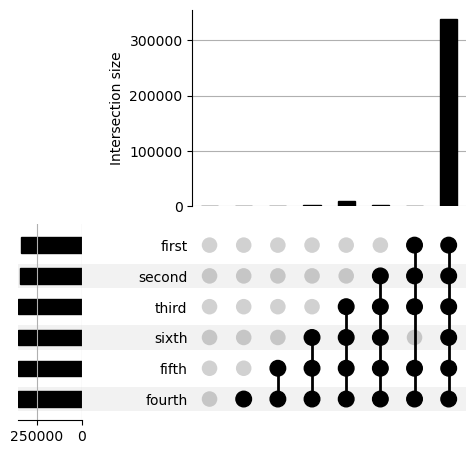

In [16]:
import upsetplot
from matplotlib import pyplot
source_counts_to_plot = source_counts.copy()
upsetplot.plot(source_counts_to_plot)
pyplot.show()

In [17]:
def summarize_missings(data, column):
    print(f"""total rows: {len(mp)}
total missing {column}: {mp[column].isna().sum()}
proportion missing sex: {mp[column].isna().mean()}
""")

Missing values for demographic values such as race or sex are usually not randomly distributed, but rather will vary in response to variation in the multiple processes contributing to missingness. If we plan to use the data to understand larger patterns, we need to be able to characterize this type of missingness in order to correctly modify our analyses -- we want to see how prevalent missingness is for each variable, and we also want to see how missingness varies along other dimensions -- for example, do missingness rates increase during certain periods of time, or are they higher within specific stations/beats when compared to others?

Thera are two types of variables that might be affected by missingness:

- we encounter missingness in procedure-based fields, which impact our understanding of the steps CPD took to investigate the report.
- there is missingness in demographic values, which impact our understanding of whose experiences are reflected in the data.

## Missingness within columns: officer arrival time

A primary way we can understand how CPD prioritizes a reported missing person is looking at how long it takes for a CPD officer to arrive at the scene to begin investigating. The first 24 hours are essential, so any delay has a big impact on the missing person and their loved ones. Unfortunately, the officer's arrival time is routinely missing in the data. Here we investigate patterns in that missingness

In [19]:
mp['missing_arrival_time'] = mp.date_officer_arrived.isna()
miss_tta_smry = mp.groupby('year_occurred').missing_arrival_time.mean().reset_index()
miss_tta_smry

,year_occurred,missing_arrival_time
0,2000,0.012301
1,2001,0.005663
2,2002,0.003864
3,2003,0.004995
4,2004,0.014777
5,2005,0.065380
6,2006,0.184979
7,2007,0.184195
8,2008,0.237306
9,2009,0.258370


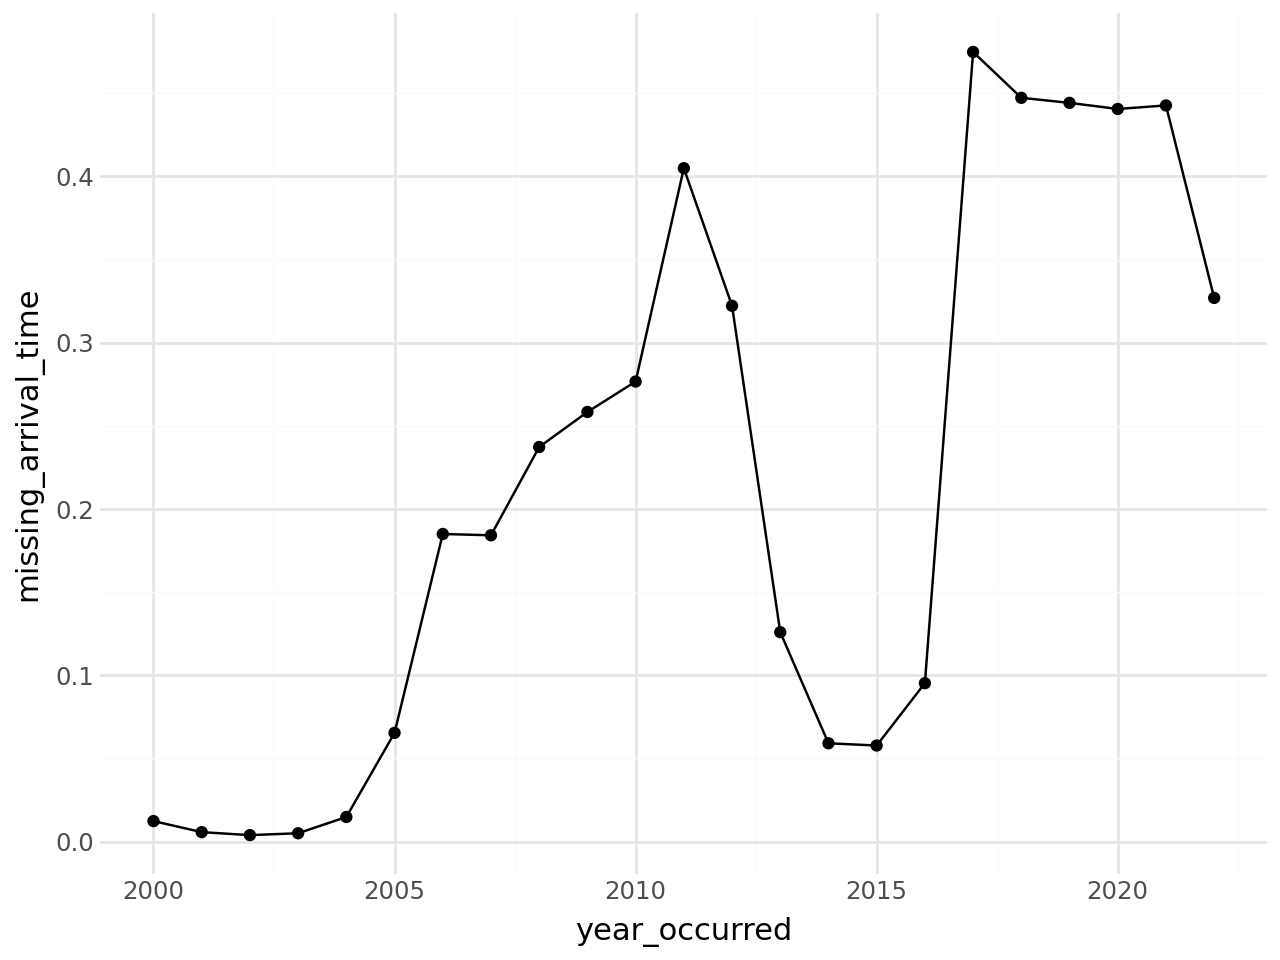

In [23]:
from plotnine import ggplot, aes, geom_point, geom_line, theme_minimal
ggplot(miss_tta_smry, aes(x = 'year_occurred', y = 'missing_arrival_time')) +\
    geom_point() + geom_line() + theme_minimal()

Overall, rates of missingness for age are low throughout the time period covered by the data.
# Missing columns: characteristics that remain unmeasured

In [24]:
mp.columns

Index(['rd_no', 'value_conflict', 'race', 'sex', 'given_age_group',
       'beat_assigned', 'no__times_missing', 'date_last_missing',
       'length_missing', 'how_located', 'place_of_birth',
       'relation_to_missing', 'occupation', 'other_occupation', 'school_name',
       'person_notified_last_name', 'person_notified_first_name',
       'notification_time', 'notification_by_last_name',
       'notification_by_first_name', 'notification_by_star',
       'flash_message_sent', 'ward_of_the_state', 'juvenile', 'address',
       'beat_occurred', 'date_occurred', 'date_officer_arrived', 'status',
       'year_of_birth', 'previously_missing', 'photo_avail', 'dental_records',
       'medical_records', 'fingerprints', 'part_time_indicated',
       'current_iucr', 'notification_to_star', 'notif_made_to_time',
       'det_inv_assgn_last_name', 'det_inv_assgn_first_name',
       'det_inv_assgn_star', 'det_status_time', 'last_update', 'age',
       'status_date', 'primary', 'description', 'clo

There are demographic indicators whose presence would provide important information about the experience of disappearance, but these indicators are not systematically collected. This affects what types of questions we might address with data analysis. A few examples:

- disability
- gender: We have data with a `sex` column that takes values in `['M', 'F']`
- group home: we can often infer based on the location of the report which reports came from group homes

There are also investigation-related fields that are not collected, but are important to our story. For example,  knowing how many people have been interviewed.